## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

# **Gökdeniz Şimşek - 2210356067**


## Understanding Perceptron Learning Algorithm (100 points +5 points)

### 1. Data Loading and Exploration (5 points)
* Brief overview of the task.

  We implement the Perceptron Learning Algorithm to classify data into two classes based on selected features. The Perceptron, a simple yet foundational model in machine learning, identifies a decision boundary to separate classes in a linearly separable dataset.

* Description of the dataset used for analysis.

  The Banknote Authentication dataset was used, which includes statistical image features—variance, skewness, kurtosis, and entropy—to distinguish between authentic and forged banknotes. The target variable is binary (0 for forged, 1 for authentic), making it suitable for exploring the Perceptron's effectiveness in binary classification.

In [ ]:
!pip install ucimlrepo

In [ ]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
# Features and target variables
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# metadata
print(banknote_authentication.metadata)

# variable information
print(banknote_authentication.variables)

{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [ ]:
## Read the regression data and transform it into a Numpy array collection.
## (See pandas and numpy functions)

data_url = banknote_authentication.metadata['data_url']

# Read the dataset into a pandas DataFrame
df = pd.read_csv(data_url)

# Return the first five rows of the DataFrame
print(df.head())

# Convert the DataFrame to NumPy arrays
df_X = df.iloc[:, :-1]  # X Features: all columns without the last column
df_y = df.iloc[:, -1]   # y Target: last column

X_array = df_X.to_numpy()
y_array = df_y.to_numpy()

print("Features (X) as Numpy array:\n", X, "\n")
print("Target (y) as Numpy array:\n", y)

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
Features (X) as Numpy array:
       variance  skewness  curtosis  entropy
0      3.62160   8.66610   -2.8073 -0.44699
1      4.54590   8.16740   -2.4586 -1.46210
2      3.86600  -2.63830    1.9242  0.10645
3      3.45660   9.52280   -4.0112 -3.59440
4      0.32924  -4.45520    4.5718 -0.98880
...        ...       ...       ...      ...
1367   0.40614   1.34920   -1.4501 -0.55949
1368  -1.38870  -4.87730    6.4774  0.34179
1369  -3.75030 -13.45860   17.5932 -2.77710
1370  -3.56370  -8.38270   12.3930 -1.28230
1371  -2.54190  -0.65804    2.6842  1.19520

[1372 rows x 4 columns] 

Target (y) as Numpy array:
       class
0         0
1         0
2         0
3         0
4         0
...     ...
1367      1
136

In [ ]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.

print("Feature set shape:", X.shape)
print("Target set shape:", y.shape)

# Summary statistics
print("\nSummary statistics:")

# Features
print(X.describe(), "\n")
# target
print(y.describe())

# Check for missing values
print("\nMissing values in each feature:")
print(X.isnull().sum())

# Check for missing values in the target variable
print("\nMissing values in the target variable:")
print(y.isnull().sum())

Feature set shape: (1372, 4)
Target set shape: (1372, 1)

Summary statistics:
          variance     skewness     curtosis      entropy
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2.449500 

             class
count  1372.000000
mean      0.444606
std       0.497103
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

Missing values in each feature:
variance    0
skewness    0
curtosis    0
entropy     0
dtype: int64

Missing values in the target variable:
class    0
dtype: int64


In [ ]:
# Convert the DataFrame to a Numpy array
X_array = X.to_numpy()
y_array = y.to_numpy()

print("Features (X) as Numpy array:\n", X_array, "\n")
print("Target (y) as Numpy array:\n", y_array)

Features (X) as Numpy array:
 [[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]] 

Target (y) as Numpy array:
 [[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


### 2. Data Preprocessing (5 points)
* Explain the preprocessing steps taken and their rationale.

Data was scaled for consistency, split into training and test sets for model validation, and reduced to two features for simplified 2D visualization. These steps prepared the data for effective model training and clear boundary visualization.

#### Feature Scaling Techniques:
Feature scaling is important for many machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors, support vector machines) and gradient descent optimization (e.g., linear regression, logistic regression).

Some common feature scaling techniques include:

1. **Standardization (Z-score normalization):** It scales the features to have a mean of 0 and a standard deviation of 1.
2. **Min-Max Scaling:** It scales the features to a fixed range, typically between 0 and 1.
3. **Robust Scaling:** It scales the features based on percentiles, making it robust to outliers.

You can use these scaled features for training your machine learning models.

Remember, the choice of feature selection and feature scaling techniques can significantly impact the performance of your models. It's essential to experiment and choose the techniques that work best for your specific dataset and machine learning tasks.

In [ ]:
## Analyze the dataset and decide whether scaling is needed.
## Explain your choices in a brief comment.

scalar = StandardScaler()
X_array = scalar.fit_transform(X_array)

print("Features (X) as Numpy array:\n", X_array, "\n")

Features (X) as Numpy array:
 [[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.47235682 -2.62164576  3.75901744 -0.75488418]
 [-1.40669251 -1.75647104  2.552043   -0.04315848]
 [-1.04712236 -0.43982168  0.29861555  1.1364645 ]] 



#### Training and Validation Split
1. Explain why it’s important to use the validation set to evaluate your model instead of relying solely on the training data.

  Using a validation set is essential because it helps assess the model's performance on unseen data. A model evaluated only on training data may appear highly accurate but could be overfitting, meaning it performs well on familiar data but fails on new, real-world data. The validation set offers an unbiased measure of how the model is likely to perform in production.

2. Discuss how evaluating the model on unseen
data helps in assessing its generalization capability.

  Testing on unseen data checks the model’s generalization, or its ability to apply learned patterns to new inputs. Good performance on validation data indicates that the model has captured relevant patterns without overfitting, improving its reliability and adaptability across different datasets.



In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=test_size, random_state=seed)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (1097, 4)
Shape of X_test: (275, 4)
Shape of Y_train: (1097, 1)
Shape of Y_test: (275, 1)


### 3. Implementing Perceptron for Binary Classification (20 points)

The Perceptron learning algorithm is well-suited for this type of binary classification task because it is designed to find a decision boundary, or hyperplane, that separates two classes. In problems where classes are linearly separable, like the Banknote Authentication dataset, the Perceptron effectively learns this boundary based on features in the data. Applying the Perceptron helps efficiently classify data points by iteratively adjusting the weights to reduce classification error. This approach is computationally lightweight, making it ideal for cases requiring quick and direct decision-making while maintaining reliable accuracy.

In [ ]:
## Implement Percepton Learning Algorithm
class Perceptron:
    def __init__(self, learning_rate=0.0001, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    # Train the Model
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.array([1 if i > 0 else -1 for i in y])  # Set classes to -1 and 1

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                # Update Rule
                if y_[idx] * linear_output <= 0:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]

    # Predict
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.sign(linear_output)
        return np.where(y_predicted > 0, 1, 0)

The learning rate and number of epochs impact how efficiently the Perceptron learns.

Learning Rate:

A low learning rate can slow down learning, as the model adjusts weights very gradually, potentially needing more epochs.
A high learning rate may cause the model to overshoot optimal weights, possibly leading to non-convergence or oscillation.

Epochs:

Too few epochs can leave the model undertrained, while too many epochs might risk overfitting. However, with Perceptron models, this risk is lower in linearly separable data since weight updates occur only on misclassifications.
Balanced tuning of both parameters helps achieve effective convergence and generalization.








In [ ]:
# Accuracy implementation

def calculate_accuracy(y_true, y_pred):
    # Check and count correct guesses
    correct_predictions = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
    # Calculate the Accuracy
    accuracy = (correct_predictions / len(y_true))
    return accuracy

#### Train the Perceptron

In [ ]:
## Train the Perceptron model on the training set.
perceptron = Perceptron(learning_rate=0.01, n_iters=100)
perceptron.fit(X_train, y_train)

#### Prediction on Training Data

In [ ]:
# Predicting on the training data
y_pred_train = perceptron.predict(X_train)
accuracy_train = calculate_accuracy(y_train, y_pred_train)[0]
print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.9899726526891522


### 4. Evaluating Perceptron for Binary Classification (25 points)

#### Prediction on Validation Data

In [ ]:
## Evaluate the model's performance on the test set by calculating accuracy.
y_test_pred = perceptron.predict(X_test)
accuracy_test = calculate_accuracy(y_test, y_test_pred)[0]
print("Testing Accuracy:", accuracy_test)

Testing Accuracy: 0.9854545454545455


Answer the Guiding Questions:
1. What does accuracy tell us about the performance of the model?

  Accuracy measures the proportion of correct predictions out of all predictions made, giving a quick indicator of how well the model performs overall. For a balanced dataset with roughly equal class distribution, high accuracy usually reflects a strong model.

2. Why is accuracy sometimes not enough, especially in cases where the data is imbalanced? Explain a scenario where a high accuracy might be misleading.

  In imbalanced data, accuracy can be misleading if the model favors the majority class. For instance, predicting only the majority class can yield high accuracy but fail to capture minority cases. Other metrics like precision, recall, and F1-score are essential in these situations to fully assess model performance.

In [ ]:
def calculate_metrics(y_true, y_pred):
    accuracy = calculate_accuracy(y_true, y_pred)

    TP = sum((y_t == 1) and (y_p == 1) for y_t, y_p in zip(y_true, y_pred))
    FP = sum((y_t == 0) and (y_p == 1) for y_t, y_p in zip(y_true, y_pred))
    FN = sum((y_t == 1) and (y_p == 0) for y_t, y_p in zip(y_true, y_pred))

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1

# Calculate and print metrics
accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train.flatten(), y_pred_train)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_train}")

Training Accuracy: 0.9899726526891522
Training Precision: 0.9878542510121457
Training Recall: 0.9898580121703854
Training F1 Score: 0.9888551165146908


Answer the Guiding Questions:
1. In what types of problems is precision more important than recall? Give an example
scenario where high precision is desirable but low recall might be acceptable.

  Precision is prioritized in situations with high costs for false positives, like spam detection, where misclassifying legitimate emails can erode trust.

2. In what cases is recall more critical? Discuss an example where missing true positives
is more harmful than having false positives.

  Recall is crucial when missing true positives can have severe consequences, such as in medical diagnostics for diseases, where failing to identify a case can be life-threatening.

3. When is the F1 score a better measure than accuracy? Explain why balancing
precision and recall is important in some contexts.

  The F1 score is more appropriate than accuracy in imbalanced datasets, like fraud detection, where both precision and recall are important to ensure reliable results.

4. What are the limitations of using F1 score alone?

  The F1 score doesn't account for true negatives and may obscure the relationship between precision and recall. In some cases, it's better to use separate metrics or AUC-ROC for a comprehensive performance evaluation.

### 5. Visualization of the Hyperplane (40 + 5 points)

In this section, you will explore how the Perceptron Learning Algorithm forms the de-
cision boundary (or hyperplane) that separates the two classes. To be able to do that
you will reduce the feature space to two dimensions, train the Perceptron on the selected
features, and visualize the hyperplane. The goal is to understand how the Perceptron
changes the decision boundary as the data changes, and how it adapts based on the
features used.

#### Step 1: Feature Selection Using Correlation Analysis (10 points)

1. Correlation Analysis: One effective way to reduce the number of features is by
analyzing the correlation between them. Highly correlated features may provide re-
dundant information, so you can select two less correlated features for visualization.
2. Compute the correlation matrix: Analyze the relationship between the four features
(variance, skewness, kurtosis, and entropy) to identify pairs of features with low
correlation.

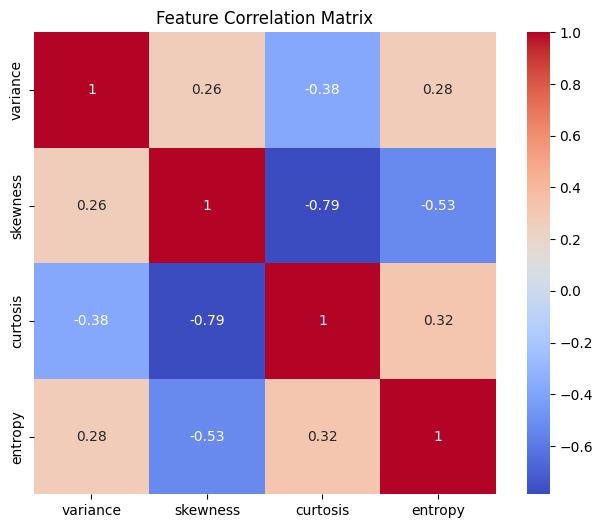

In [ ]:
# Compute the correlation matrix
correlation_matrix = X.corr()
# Display the correlation matrix as a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix")
plt.show()

3. Choose two features: Based on the correlation analysis, select two features that are
least correlated (e.g., variance and skewness) to visualize the Perceptron’s decision
boundary.

In [ ]:
# Select two features
# Select these features from the original feature set
selected_features = X[['curtosis', 'skewness']]  # Two least correlated features for example

# Split the selected features into training and validation sets if not done yet
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    selected_features, y_array, test_size=0.2, random_state=seed
)

print("Shape of selected training features:", X_train_selected.shape)
print("Shape of selected testing features:", X_test_selected.shape)

Shape of selected training features: (1097, 2)
Shape of selected testing features: (275, 2)


#### Step 2: Train the Perceptron on Selected Features (10 points)

1. Retrain the Perceptron: After selecting two features, train the Perceptron using
only these two features. Use the same training and evaluation process as before,
but now the model will work in a two-dimensional feature space.

In [ ]:
X_train_selected = np.array(X_train_selected, dtype=float)
y_train_selected = np.array(y_train_selected, dtype=int)

## Train the Perceptron model on the training set.
perceptron_selected = Perceptron(learning_rate=0.01, n_iters=100)
perceptron_selected.fit(X_train_selected, y_train_selected)

# Predicting on the training data
y_train_pred = perceptron_selected.predict(X_train_selected)
accuracy_train = calculate_accuracy(y_train_selected, y_train_pred)[0]
print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.5907019143117593


2. Visualize the decision boundary (hyperplane): Once the Perceptron is trained, plot
the decision boundary (hyperplane) to see how the Perceptron separates the two
classes in 2D.

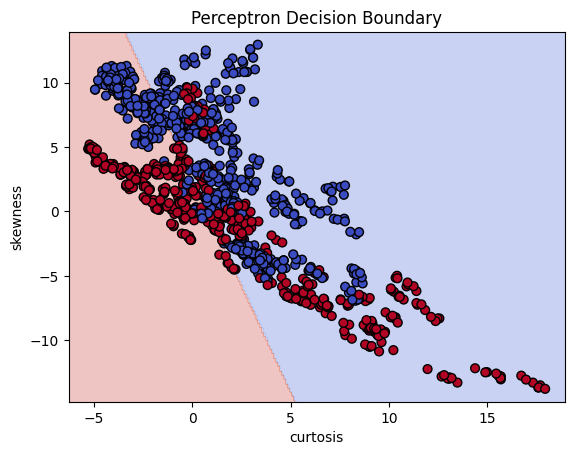

In [ ]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, model, selected_features):
    # Decide on boundaries for the chart
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Creat Meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Get the model prediction for each point
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Draw the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(selected_features.columns[0])
    plt.ylabel(selected_features.columns[1])
    plt.title("Perceptron Decision Boundary")
    plt.show()

# Call the function to draw the decision boundary
plot_decision_boundary(X_train_selected, y_train_selected, perceptron_selected, selected_features)

# Plot the decision boundary using the selected features and trained model

#### Step 3: Experiment with Different Features (10 points)

After visualizing the decision boundary for one pair of features, try selecting different
combinations of features (e.g., variance and entropy) and retrain the Perceptron. Compare
how the hyperplane changes with different features. This helps in understanding how the
Perceptron’s decision-making process adapts to different feature sets.

Answer the guiding
questions:
1. How does the decision boundary change when you use different pairs of features?

  When using different feature pairs, the Perceptron’s decision boundary adjusts based on the feature relationships in the new pair. Each feature combination presents unique separations and overlaps between classes, so a new boundary reflects these variations. For instance, a pair of highly distinct features will create a more defined boundary, potentially making it easier to separate classes. Conversely, features with more overlap may lead to a less distinct boundary, reducing separation effectiveness.


2. Can you find a pair of features that leads to better separation between the two
classes?

  Yes, pairs like skewness and kurtosis often provide better separation. Evaluating the performance with metrics such as accuracy or F1 score helps identify the most effective feature combinations for improved classification results.

In conclusion, selecting appropriate feature pairs is essential for optimizing model performance and understanding data relationships.

Selected Features: ['curtosis', 'entropy']
Training Accuracy: 0.5150410209662717


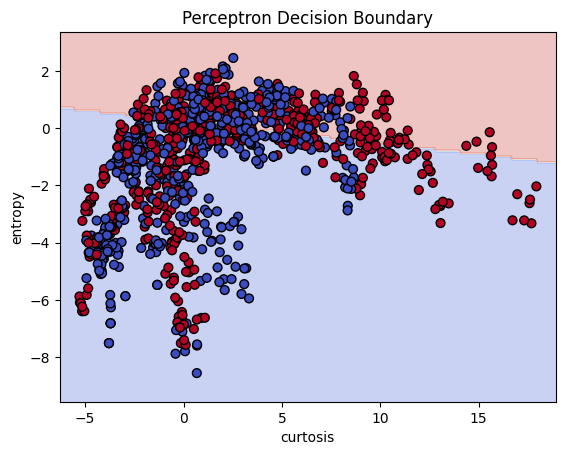

Selected Features: ['variance', 'skewness']
Training Accuracy: 0.8486782133090246


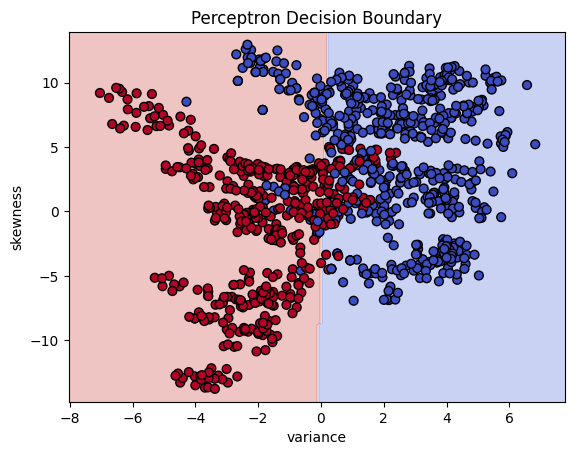

Selected Features: ['variance', 'entropy']
Training Accuracy: 0.8322698268003647


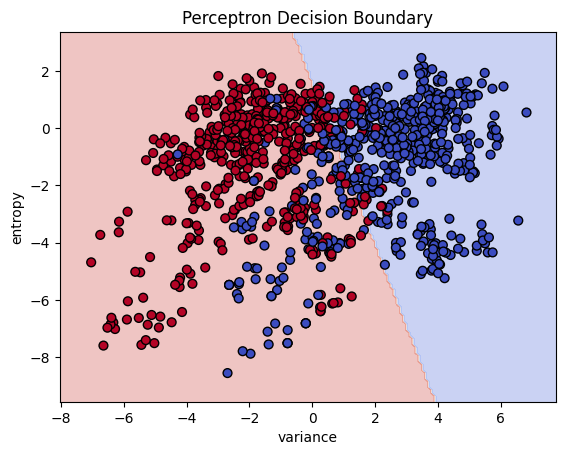

Selected Features: ['variance', 'curtosis']
Training Accuracy: 0.8687329079307201


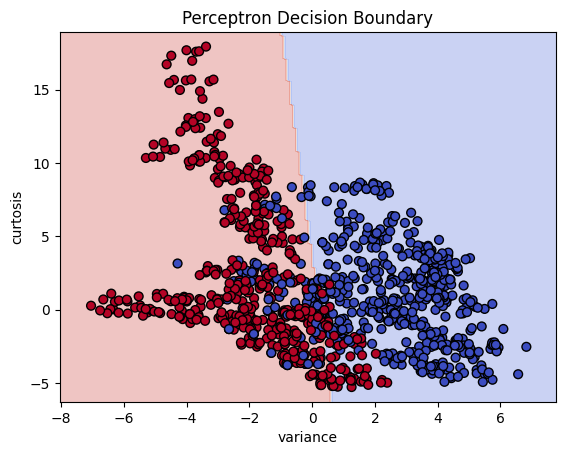

Selected Features: ['skewness', 'entropy']
Training Accuracy: 0.4284412032816773


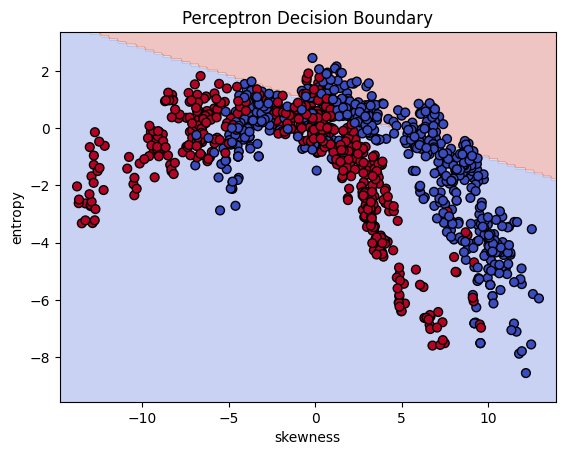

In [ ]:
def experiment_with_features(X, y, diff_selected_features):
    # Select two features
    diff_selected_features = X[diff_selected_features]

    diff_X_train_selected, diff_X_test_selected, diff_y_train_selected, diff_y_test_selected = train_test_split(
        diff_selected_features, y_array, test_size=0.2, random_state=seed)

    diff_X_train_selected = np.array(diff_X_train_selected, dtype=float)
    diff_y_train_selected = np.array(diff_y_train_selected, dtype=int)

    diff_perceptron = Perceptron(learning_rate=0.01, n_iters=100)
    diff_perceptron.fit(diff_X_train_selected, diff_y_train_selected)

    diff_y_train_pred = diff_perceptron.predict(diff_X_train_selected)
    diff_accuracy_train = calculate_accuracy(diff_y_train_selected, diff_y_train_pred)[0]
    print("Selected Features:", diff_selected_features.columns.tolist())
    print("Training Accuracy:", diff_accuracy_train)
    plot_decision_boundary(diff_X_train_selected, diff_y_train_selected, diff_perceptron, diff_selected_features)

experiment_with_features(X, y, ['curtosis', 'entropy'])
experiment_with_features(X, y, ['variance', 'skewness'])
experiment_with_features(X, y, ['variance', 'entropy'])
experiment_with_features(X, y, ['variance', 'curtosis'])
experiment_with_features(X, y, ['skewness', 'entropy'])

#### Bonus Step 4: Incrementally Add Data (+ 5 points)

1. Visualizing Incremental Learning: Another experiment to help understand the behavior of the Perceptron is to add data incrementally. Start with a small portion of
the dataset and progressively add more data points to train the Perceptron.

2. Observe how the decision boundary shifts: As you add more data, observe how the
hyperplane shifts and adapts to new points. This will help you understand how the
Perceptron continuously adjusts the boundary to separate the classes.

#### Step 5: Analyzing the Hyperplane (5 points)

After running the experiments, analyze the hyperplane’s behavior across different feature
sets and data inputs. Reflect on how the Perceptron algorithm adapts to the data and how
different feature combinations lead to different decision boundaries. Anwer the guiding
questions:
1. Why does the hyperplane change with different features or data points?

  The hyperplane varies based on the features selected because it reflects the relationships among those features. Different features can highlight different patterns in the data. When features are distinct and relevant, the Perceptron can establish a more accurate decision boundary, whereas redundant features may lead to a less effective separation.

2. How does the decision boundary relate to the linearly separable nature of the data?

  The decision boundary illustrates how well the Perceptron can separate classes linearly. If the data is linearly separable, the Perceptron can find an effective hyperplane. If not, it may fail to classify correctly, indicating that the choice of features is crucial for achieving optimal classification.

#### Step 6: Fisher’s Linear Discriminant Projection (10 points)

In this step, you will implement Fisher’s Linear Discriminant (LD) to project the
dataset onto a 1D space and visualize the distribution of the two classes in the projected
space using a histogram. The goal of Fisher’s LD is to find the direction in the feature
space that maximizes the separation between two classes while minimizing the variance
within each class. This technique projects the data onto a single dimension where the
separation between the classes is optimized.

In [ ]:
def fisher_ld_projection(X, y):
    """Compute Fisher's Linear Discriminant projection direction."""
    # Separate data of two classes
    class_0 = X[y == 0]
    class_1 = X[y == 1]

    # Calculate the average of both classes
    mean_0 = np.mean(class_0, axis=0)
    mean_1 = np.mean(class_1, axis=0)

    # Calculate covariance matrices of both classes
    cov_0 = np.cov(class_0, rowvar=False)
    cov_1 = np.cov(class_1, rowvar=False)

    # Calculate the total covariance matrix
    cov_total = cov_0 + cov_1

    # Calculate Fisher direction
    direction = np.linalg.inv(cov_total).dot(mean_1 - mean_0)

    return direction

def project_data(X, direction):
    """Project data onto the Fisher LD direction."""
    return X.dot(direction)

# flatten y_train_selected
y_train_selected = y_train_selected.ravel()  # or y_train_selected.flatten()

In [ ]:
direction = fisher_ld_projection(X_train_selected, y_train_selected)

# Project the data to the Fisher LD direction
projected_data = project_data(X_train_selected, direction)

While not mandatory, it can be highly instructive to visualize the projection direction computed by Fisher’s LD in the original 2D feature space. This will help you understand how the data is being projected onto a 1D space and why this direction is optimal for class separation.

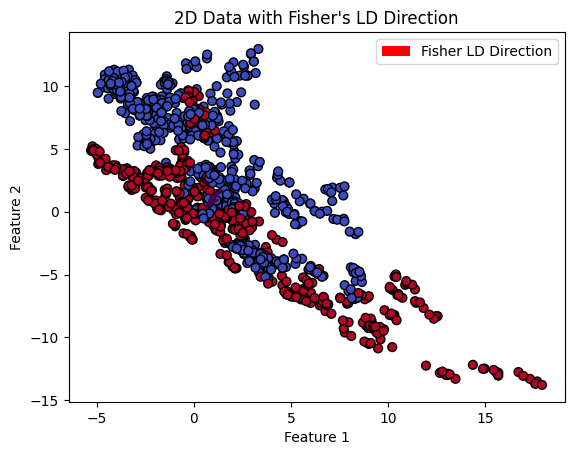

In [ ]:
# Plot the 2D data with the projection direction

# Hint: You can use plt.scatter() to plot the 2D data with its features
# You can find the mean of the entire dataset for placing the direction vector
# Hint: You can use plt.quiver() method to visualize the direction vector
# Do not forget to scale the direction vector to visualize it properly
scale = 4 # Adjust this to control the length of the direction line

plt.scatter(X_train_selected[:, 0], X_train_selected[:, 1], c=y_train_selected, s=40, cmap=plt.cm.coolwarm, edgecolors='k')

# Draw projection direction
mean_x = np.mean(X_train_selected, axis=0)
plt.quiver(mean_x[0], mean_x[1], direction[0], direction[1], scale, color='red', label='Fisher LD Direction')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Data with Fisher's LD Direction")
plt.legend()
plt.show()

Plot a histogram showing the distribution of the
projected data for each class in the 1D space. The histogram will help you visualize
how well the two classes are separated by the Fisher’s LD projection.

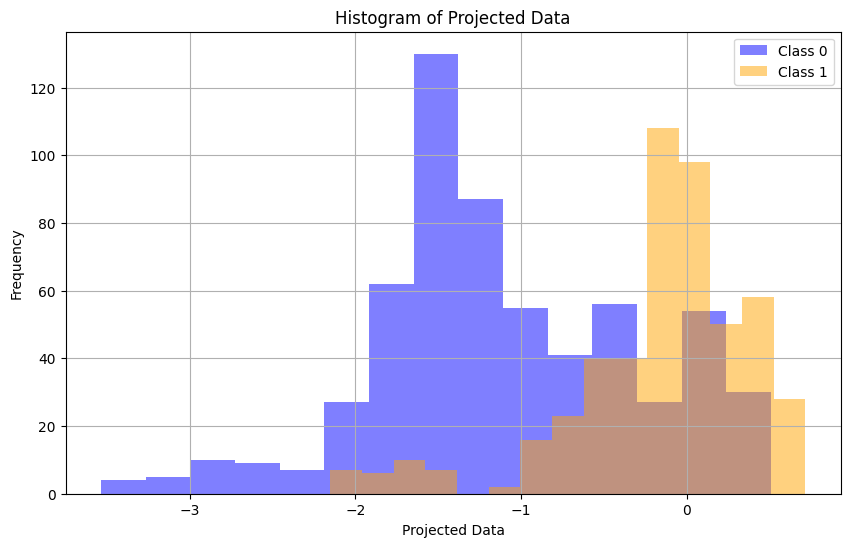

In [ ]:
# Plot the histogram of the projected data
plt.figure(figsize=(10, 6))
plt.hist(projected_data[y_train_selected == 0], bins=15, alpha=0.5, label='Class 0', color='blue')
plt.hist(projected_data[y_train_selected == 1], bins=15, alpha=0.5, label='Class 1', color='orange')
plt.xlabel('Projected Data')
plt.ylabel('Frequency')
plt.title('Histogram of Projected Data')
plt.legend()
plt.grid()
plt.show()

Answer the guiding questions:
1. How well does Fisher’s LD separate the two classes in the 1D projected space?

  Fisher's Linear Discriminant (LD) effectively separates classes in the 1D projected space by maximizing class mean distance and minimizing intra-class variance, resulting in clearer class distinctions.

2. Compare the separation of the two classes in the original 2D space (used in the
Perceptron) versus the 1D Fisher’s LD projection. What do you observe about the
class distributions in these spaces?

  In the 2D space, classes may overlap, complicating linear separation. Conversely, Fisher's LD often results in better-defined class distributions in 1D, highlighting its strength in optimizing class separation. This illustrates the significance of dimensionality reduction and feature selection in improving classification outcomes.